# **Installs**

In [ ]:
! pip install skimpy
! pip install lightgbm

# **Imports**

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
#from skimpy import skim

# **Carga de Datos**

In [201]:
url = 'https://raw.githubusercontent.com/agusgonzalezc/AnalisisPredictivo/main/Final/train.csv'
df = pd.read_csv(url)

In [202]:
pd.options.display.max_columns = None

In [203]:
df.shape

(103904, 25)

# Base de Datos
El presente trabajo tiene como objetivo analizar la base de datos Airline Passenger Satisfaction de Kaggle, la cual se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv. La base de datos cuenta con **25** variables y **103,904** registros que contienen informacion sobre una encuesta realizado a distintos pasajeros de una aerolinea. 
El objetivo es poder predecir si el cliente va a estar satisfecho con el servicio de la aerolinea o le es indiferente/no esta satisfecho.

# Objetivo
El objetivo es predecir si el cliente va a estar satisfecho con el servicio de la aerolinea o le va a ser indiferente/no estar satisfecho.

# Variables
Las variables de la base de datos son las siguientes:

Las primeras variables contienen informacion sobre el cliente:

| Variable                          | Descripción                                                                |
|-----------------------------------|----------------------------------------------------------------------------|
| 0                                 | Row Number                                                                 |
| Id                                | Client Id                                                                  |
| Variable                          | Descripcion                                                                |
| Gender                            | Gender of the passengers (Female, Male)                                    |
| Customer                          | The customer type (Loyal customer, disloyal customer)                      |
| Age                               | The actual age of the passengers                                           |

Las siguientes variables se refieren al vuelo especifico que realizo el cliente:

| Variable                          | Descripción                                                                |
|-----------------------------------|----------------------------------------------------------------------------|
| Type                              | Purpose of the flight of the passengers (Personal Travel, Business Travel) |
| Class                             | Travel class in the plane of the passengers (Business, Eco, Eco Plus)      |
| Flight distance                   | The flight distance of this journey                                        |
| Departure Delay in Minutes        | Minutes delayed when departure                                             |
| Arrival Delay in Minutes          | Minutes delayed when Arrival                                               |

Las ultimas variables contienen informacion sobre el nivel de satisfaccion del cliente en distintos aspectos:

| Variable                          | Descripción                                                                |
|-----------------------------------|----------------------------------------------------------------------------|
| Inflight wifi service             | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)     |
| Departure/Arrival time convenient | Satisfaction level of Departure/Arrival time convenient                    |
| Ease of Online booking            | Satisfaction level of online booking                                       |
| Gate location                     | Satisfaction level of Gate location                                        |
| Food and drink                    | Satisfaction level of Food and drink                                       |
| Online boarding                   | Satisfaction level of online boarding                                      |
| Seat comfort                      | Satisfaction level of Seat comfort                                         |
| Inflight entertainment            | Satisfaction level of inflight entertainment                               |
| On-board service                  | Satisfaction level of On-board service                                     |
| Leg room service                  | Satisfaction level of Leg room service                                     |
| Baggage handling                  | Satisfaction level of baggage handling                                     |
| Check-in service                  | Satisfaction level of Check-in service                                     |
| Inflight service                  | Satisfaction level of inflight service                                     |
| Cleanliness                       | Satisfaction level of Cleanliness                                          |

La variable a predecir es: 

| Variable                          | Descripción                                                                |
|-----------------------------------|----------------------------------------------------------------------------|
| Satisfaction                      | Airline satisfaction level(Satisfaction, neutral or dissatisfaction)       |

# Hipotesis


*   Las clases influyen en la satisfaccion del cliente
*   Cuanto mas grande sea la distancia del vuelo, mayor es la probabilidad de estar insatisfecho



# **Vista de los datos**

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [205]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [206]:
#skim(df)

Luego de haber analizado todas las variables, se llego a la conclusion de que la variable **id** y  **unnamed:0** no se utilizaran para el analisis de la base de datos. Ademas, la variable **Arrival Delay in Minutes** tiene **310 missings**.



---



In [207]:
df=df.drop(['Unnamed: 0','id'],axis=1)



---



In [208]:
df.columns = df.columns.str.replace(' ', '_')

In [209]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [210]:
df.columns = df.columns.str.replace('Flight_Distance', 'FlightDistance')
df.columns = df.columns.str.replace('Inflight_wifi_service', 'Inflight-wifiService')
df.columns = df.columns.str.replace('Departure/Arrival_time_convenient', 'Departure/Arrival_TimeConvenience')
df.columns = df.columns.str.replace('Food_and_drink', 'Food/Drink')
df.columns = df.columns.str.replace('Ease_of_Online_booking', 'OnlineBooking_Ease')
df.columns = df.columns.str.replace('Gate_location', 'GateLocation')
df.columns = df.columns.str.replace('Online_boarding', 'OnlineBoarding')
df.columns = df.columns.str.replace('Seat_comfort', 'SeatComfort')
df.columns = df.columns.str.replace('Inflight_entertainment', 'InflightEntertainment')
df.columns = df.columns.str.replace('On-board_service', 'On-boardService')
df.columns = df.columns.str.replace('Leg_room_service', 'Leg-roomService')
df.columns = df.columns.str.replace('Baggage_handling', 'BaggageHandling')
df.columns = df.columns.str.replace('Checkin_service', 'CheckinService')
df.columns = df.columns.str.replace('InflightService', 'InflightService')
df.columns = df.columns.str.replace('Arrival_Delay_in_Minutes', 'ArrivalDelay')
df.columns = df.columns.str.replace('Departure_Delay_in_Minutes', 'DepartureDelay')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   FlightDistance                     103904 non-null  int64  
 6   Inflight-wifiService               103904 non-null  int64  
 7   Departure/Arrival_TimeConvenience  103904 non-null  int64  
 8   OnlineBooking_Ease                 103904 non-null  int64  
 9   GateLocation                       103904 non-null  int64  
 10  Food/Drink                         103904 non-null  int64  
 11  OnlineBoarding                     1039

# **Distribucion de variable Target**

In [225]:
counts = df["satisfaction"].value_counts()

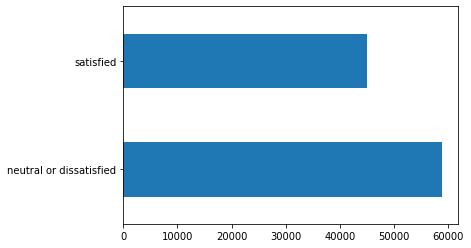

In [226]:
counts.plot.barh()

In [227]:
round(df['satisfaction'].value_counts(normalize=True)*100,1)

neutral or dissatisfied    56.7
satisfied                  43.3
Name: satisfaction, dtype: float64

Se puede observar que la variable esta balanceada ya que el **43,3%** de las personas estan satisfechas con el servicio.

# **Missing Values**

In [215]:
df.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
FlightDistance                         0
Inflight-wifiService                   0
Departure/Arrival_TimeConvenience      0
OnlineBooking_Ease                     0
GateLocation                           0
Food/Drink                             0
OnlineBoarding                         0
SeatComfort                            0
InflightEntertainment                  0
On-boardService                        0
Leg-roomService                        0
BaggageHandling                        0
CheckinService                         0
Inflight_service                       0
Cleanliness                            0
DepartureDelay                         0
ArrivalDelay                         310
satisfaction                           0
dtype: int64

In [216]:
miss_arrival = df.loc[df['ArrivalDelay'].isnull()==True]
miss_arrival["satisfaction"].value_counts()

neutral or dissatisfied    182
satisfied                  128
Name: satisfaction, dtype: int64

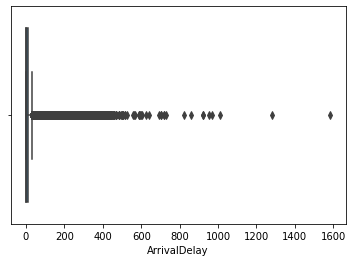

In [217]:
sns.boxplot(x="ArrivalDelay",data=df)

Las missings de la variable **ArrivalDelay** van a ser imputados con la mediana.

In [218]:
df["ArrivalDelay"] = df["ArrivalDelay"].fillna(df["ArrivalDelay"].median())

# **Variables numericas**

In [219]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
FlightDistance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight-wifiService,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_TimeConvenience,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
OnlineBooking_Ease,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
GateLocation,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food/Drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
OnlineBoarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
SeatComfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
InflightEntertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [220]:
#df['Arrival_Delay'] = df['Arrival_Delay'].astype(int)

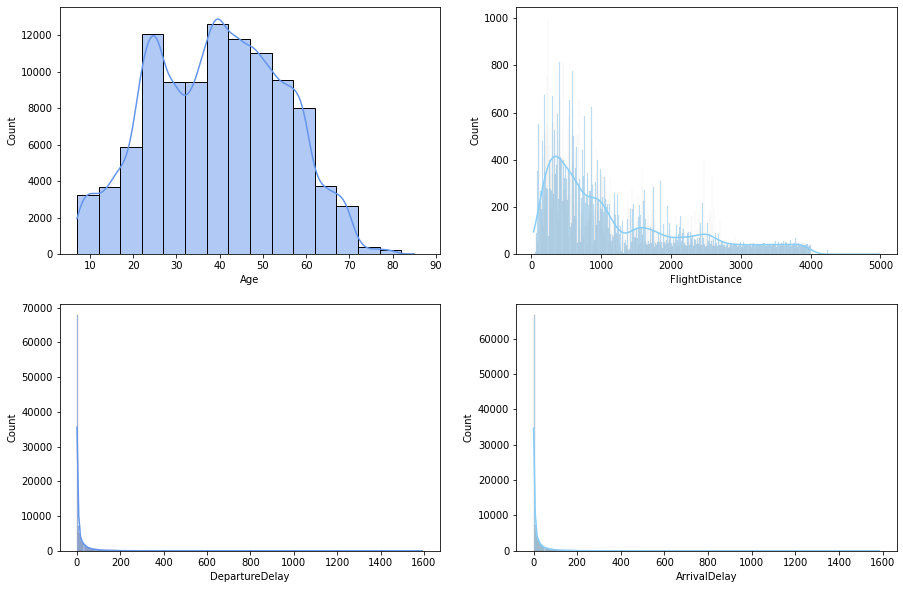

In [221]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x="Age", kde=True, color="cornflowerblue", ax=axs[0, 0],binwidth = 5)
sns.histplot(data=df, x="FlightDistance", kde=True, color="lightskyblue", ax=axs[0, 1],binwidth = 5)
sns.histplot(data=df, x="DepartureDelay", kde=True, color="cornflowerblue", ax=axs[1, 0],binwidth = 5)
sns.histplot(data=df, x="ArrivalDelay", kde=True, color="lightskyblue", ax=axs[1, 1],binwidth = 5)

plt.ylim=(0, 40000)
plt.xlim=(0, 100)

plt.show()

Para la variable **Age**, podemos observar que la mayoria de los clientes que contestaron la encuesta tienen entre 25 y 60 años. La mayoria de **las distancias de los vuelos** tienen valores entre 0 y 1000 millas. Finalmente, las variables **DepartureDelay** y **ArrivalDelay** se compartan de manera similar y sus valores se encuentran cercanos al 0.



---

## **Ratings**

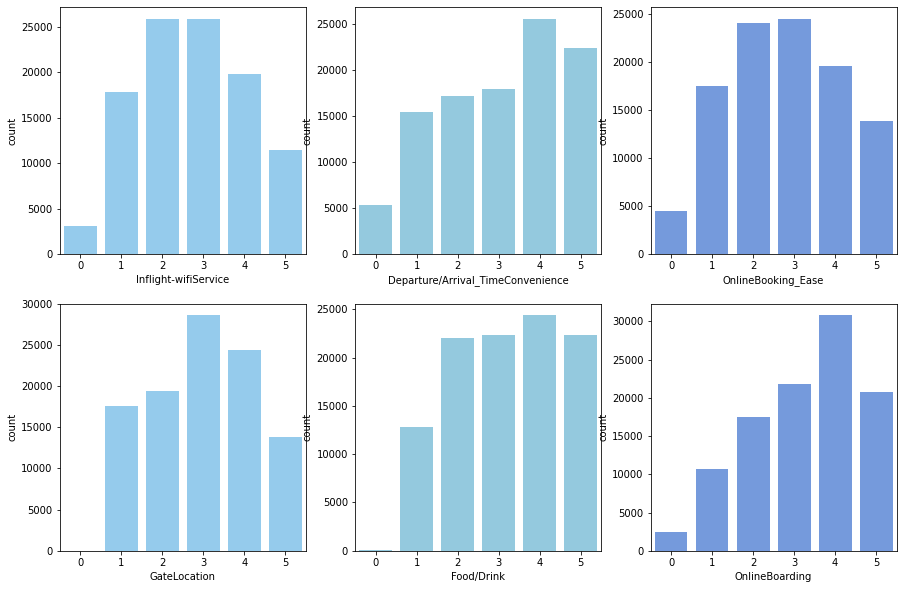

In [222]:
fig, axs = plt.subplots(2,3, figsize=(15, 10))

sns.countplot(data=df, x="Inflight-wifiService", color="lightskyblue", ax=axs[0, 0])
sns.countplot(data=df, x="Departure/Arrival_TimeConvenience", color="skyblue", ax=axs[0, 1])
sns.countplot(data=df, x="OnlineBooking_Ease",color="cornflowerblue", ax=axs[0, 2])
sns.countplot(data=df, x="GateLocation", color="lightskyblue", ax=axs[1,0])
sns.countplot(data=df, x="Food/Drink",color="skyblue", ax=axs[1, 1])
sns.countplot(data=df, x="OnlineBoarding", color="cornflowerblue", ax=axs[1, 2])
plt.ylim=(0, 40000)
plt.xlim=(0, 500)

plt.show()

**Inflight-Wifi Service** y **OnlineBooking Ease** tienen una distribucion similar donde los valores mas frecuentes se encuentren entre el 2 y 3.
**Departure/Arrival Time Convenience** y **OnlineBoarding**

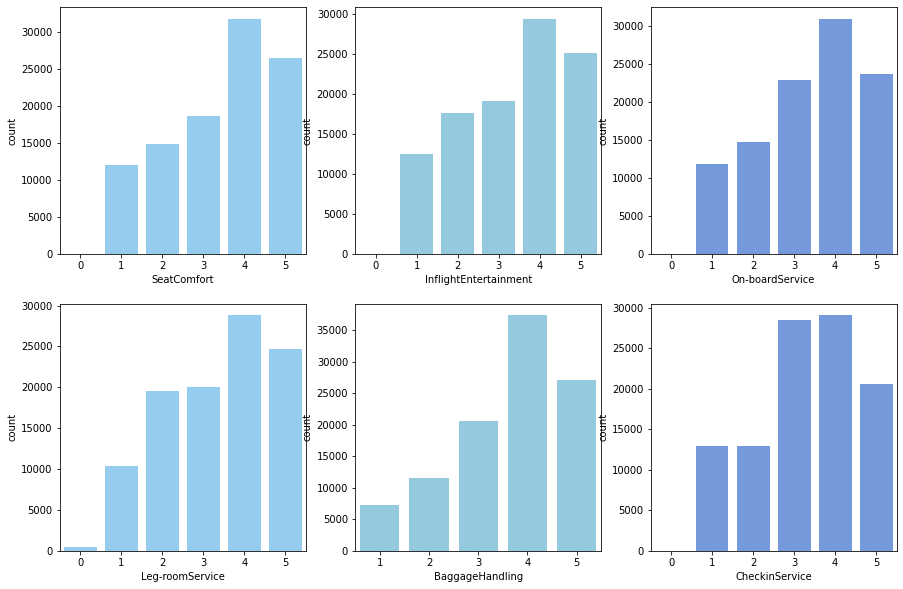

In [223]:
fig, axs = plt.subplots(2,3, figsize=(15, 10))
sns.countplot(data=df, x="SeatComfort", color="lightskyblue", ax=axs[0, 0])
sns.countplot(data=df, x="InflightEntertainment", color="skyblue", ax=axs[0, 1])
sns.countplot(data=df, x="On-boardService",color="cornflowerblue", ax=axs[0, 2])
sns.countplot(data=df, x="Leg-roomService",color="lightskyblue", ax=axs[1, 0])
sns.countplot(data=df, x="BaggageHandling",color="skyblue", ax=axs[1, 1],)
sns.countplot(data=df, x="CheckinService",color="cornflowerblue", ax=axs[1, 2])
plt.ylim=(0, 40000)
plt.xlim=(0, 100)

plt.show()

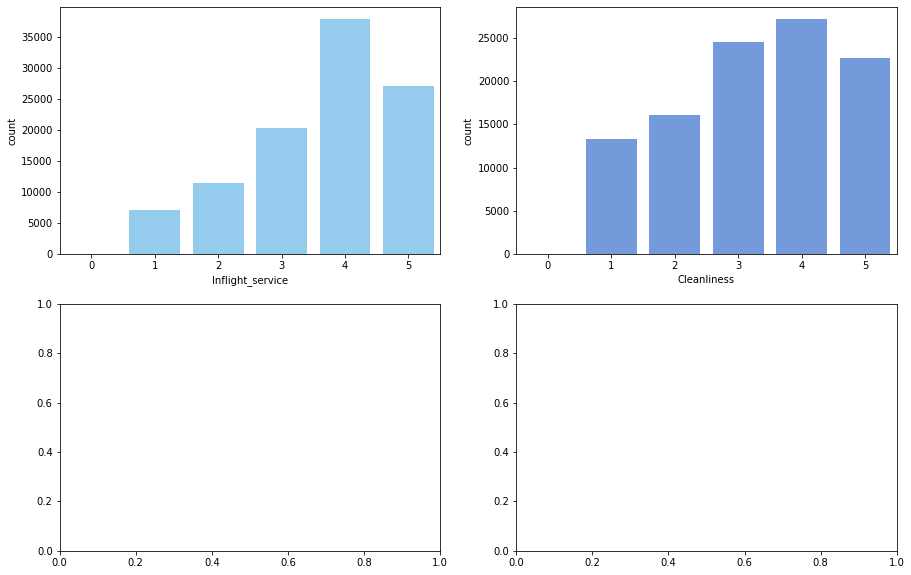

In [224]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
sns.countplot(data=df, x="Inflight_service", color="lightskyblue", ax=axs[0, 0])
sns.countplot(data=df, x="Cleanliness",color="cornflowerblue", ax=axs[0, 1])

plt.ylim=(0, 40000)
plt.xlim=(0, 100)

plt.show()

# **Variables Categoricas**

In [228]:
df.describe(include='object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer_Type,103904,2,Loyal Customer,84923
Type_of_Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [229]:
#df.iloc[:,col_cat] = df.iloc[:,col_cat].astype("category")

---
##Frecuencias

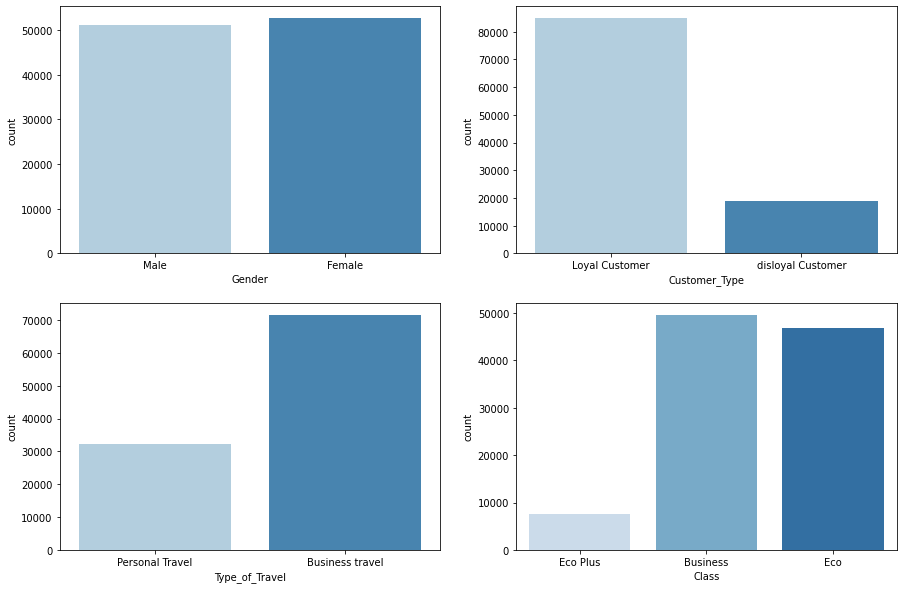

In [230]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
sns.countplot(data=df, x="Gender",palette="Blues", ax=axs[0, 0])
sns.countplot(data=df, x="Customer_Type",palette="Blues", ax=axs[0, 1])
sns.countplot(data=df, x="Type_of_Travel",palette="Blues", ax=axs[1, 0])
sns.countplot(data=df, x="Class",palette="Blues", ax=axs[1, 1])
plt.ylim=(0, 40000)
plt.xlim=(0, 100)

plt.show()

De las personas que contestaron la encuesta:

  **Gender:** la cantidad de mujeres y hombres es casi la misma

  **Customer type:** la mayoria de las personas son clientes fieles

  **Travel type:** mas del doble de las personas que viajaron lo hicieron por negocios

  **Class:** hay una leve mayoria de las personas que viajan en Business de las que viajan en Eco

# **Outliers**

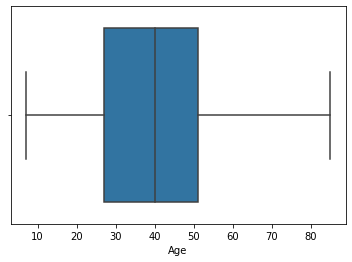

In [231]:
sns.boxplot(x="Age",data=df)

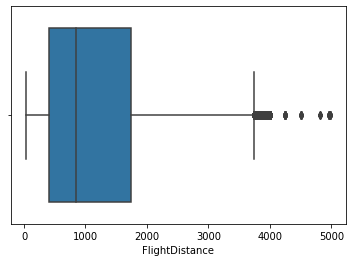

In [232]:
sns.boxplot(x="FlightDistance",data=df)

Es coherente, la distancia mas larga es a Singapore con 9,537 millas

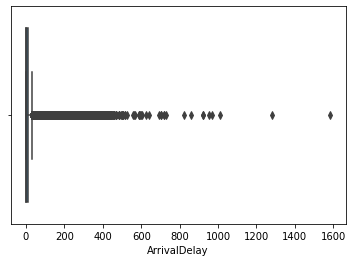

In [233]:
sns.boxplot(x="ArrivalDelay",data=df)

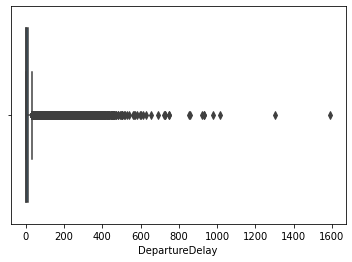

In [299]:
sns.boxplot(x="DepartureDelay",data=df)

# **Correlaciones**

Se estudio la correlacion entre las variables numericas ya que esto podria influir en los algoritmos utilizados.

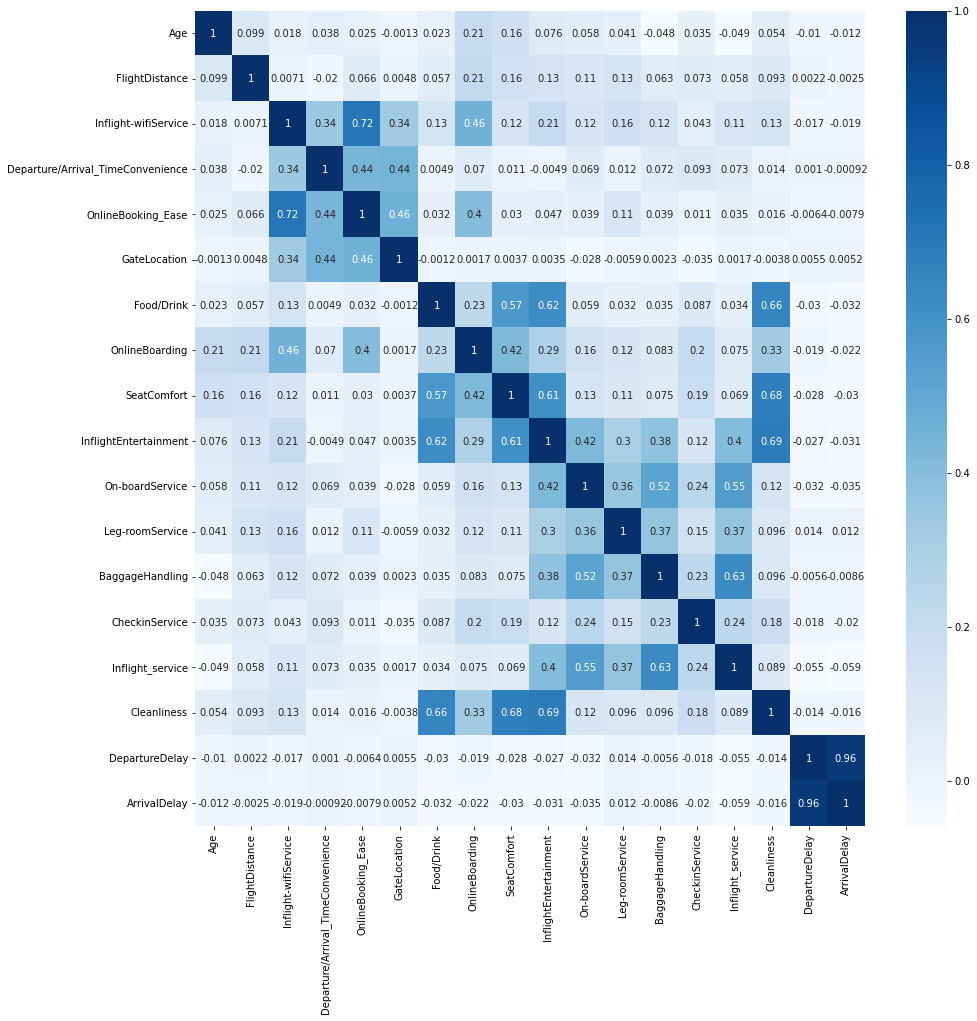

In [234]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap = 'Blues')

A partir de la matriz de correlacion, se puede observar una fuerte correlacion positiva entre las variables **Departure Delay in Minutes** y **Arrival Delay in Minutes**. Esto tiene sentido ya que comunmente, si un avion se retrasa en su partida, se retrasara de misma manera en su llegada.

# **EDA**



---

## Gender

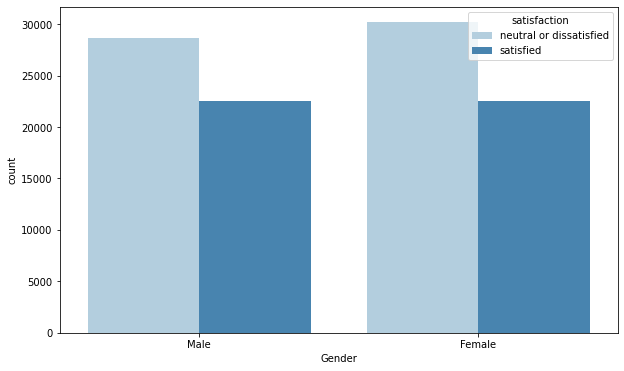

In [235]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x="Gender",hue="satisfaction",palette="Blues")
plt.show()

No existe una gran diferencia entre la cantidad de hombres y mujeres que estan satisfechos o no, por lo tanto ambos sexos tienen una probabilidad similar de estar satisfechos con el servicio.



---
## Customer Type

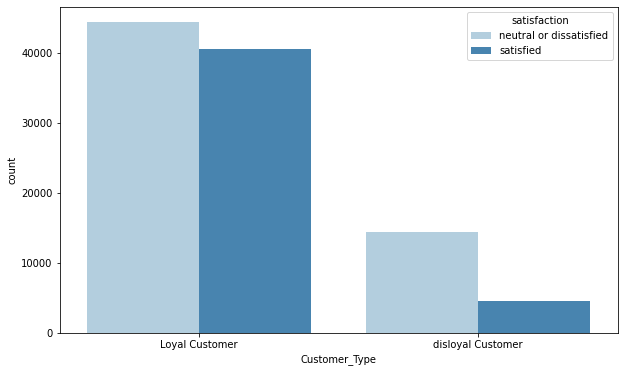

In [236]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x="Customer_Type",hue="satisfaction",palette="Blues")
plt.show()

El cliente desleal tiene una mayor probabilidad de no estar satisfecho con el servicio de la empresa.



---
## Type of Travel

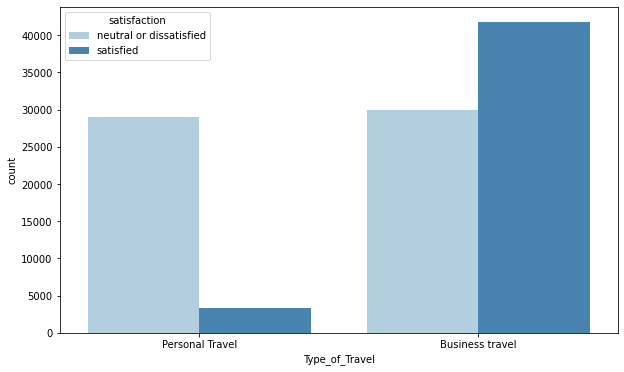

In [237]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x="Type_of_Travel",hue="satisfaction",palette="Blues")
plt.show()

Las personas que viajan con por razones personales, tienen una mayor probabilidad de no estar satisfechos con el servicio. Por el otro lado, las personas que viajan por negocios tienen una mayor probabilidad de estar satisfechos.



---
## Class

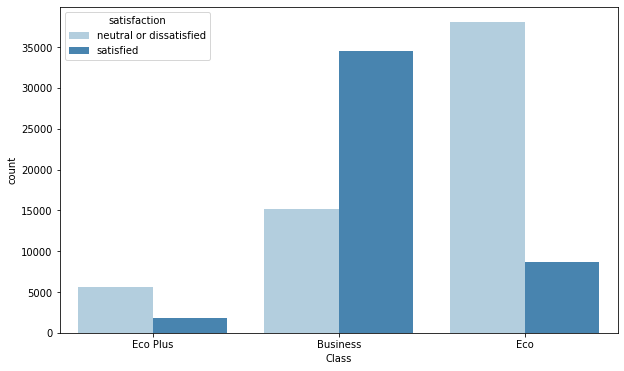

In [238]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x="Class",hue="satisfaction",palette="Blues")
plt.show()

In [239]:
round(df.groupby(["Class"])["satisfaction"].value_counts(normalize=True)*100,1)

Class     satisfaction           
Business  satisfied                  69.4
          neutral or dissatisfied    30.6
Eco       neutral or dissatisfied    81.4
          satisfied                  18.6
Eco Plus  neutral or dissatisfied    75.4
          satisfied                  24.6
Name: satisfaction, dtype: float64

Las personas que viajan en Business Class tienen una mayor probabilidad de estar satisfechos mientras que las personas que viajan en Eco y Eco Plus tienen una mayor probabbilidad de estar insatisfechos con el servicio.

In [240]:
df.groupby('Class').mean().T

Class,Business,Eco,Eco Plus
Age,41.574328,37.164253,38.654524
FlightDistance,1675.976925,743.439748,747.125567
Inflight-wifiService,2.775315,2.675067,2.767948
Departure/Arrival_TimeConvenience,2.905910,3.199123,3.217507
OnlineBooking_Ease,2.913964,2.605241,2.661996
GateLocation,2.982926,2.971954,2.967574
Food/Drink,3.323165,3.086277,3.122631
OnlineBoarding,3.716541,2.812985,2.889245
SeatComfort,3.760858,3.138838,3.183747
InflightEntertainment,3.635437,3.098256,3.141713


Las personas que vuelan en Business class le dieron en promedio los mejores ratings.



---
## Age

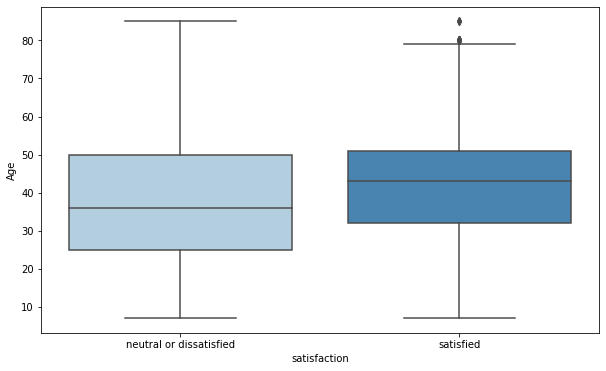

In [241]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = "satisfaction", y = "Age",palette="Blues", data = df)
plt.show()

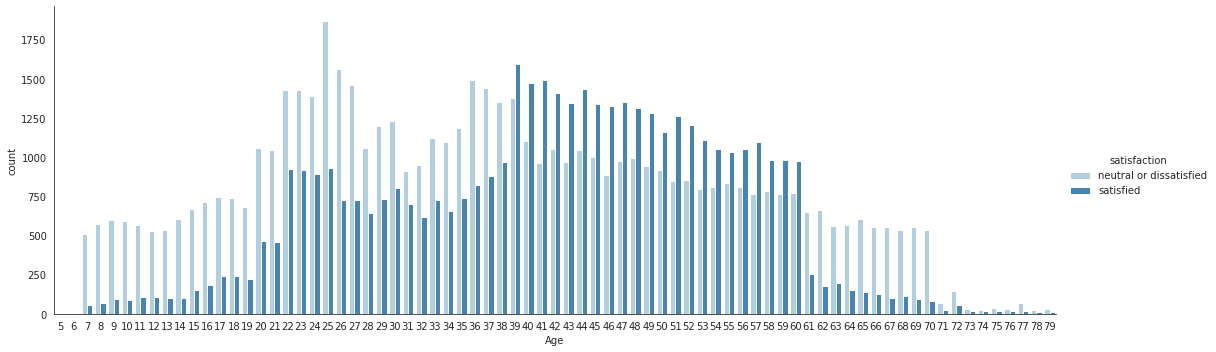

In [242]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80),palette="Blues")

Las personas entre los ranges de **7-38** y **61-79** años tienen una mayor probabilidad de estar insatisfechos mientras que las personas entre los **39-60** años tienen una probabilidad mas grande de estar satisfechos.



---

## Flight Distance

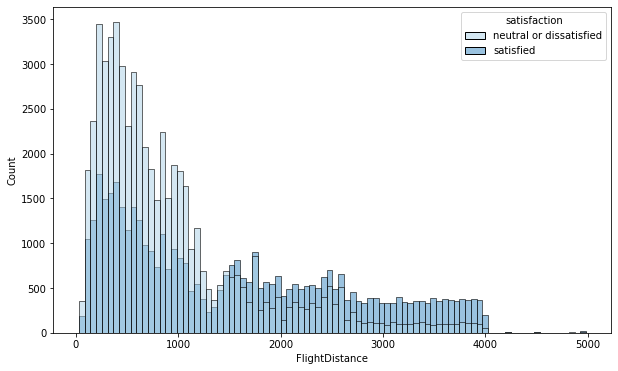

In [243]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(x="FlightDistance",hue="satisfaction",data=df,palette="Blues")
plt.show()

Contrario a lo que se espera, cuanto mayor es la distancia, menor es la probabilidad de estar insatisfecho con el servicio.

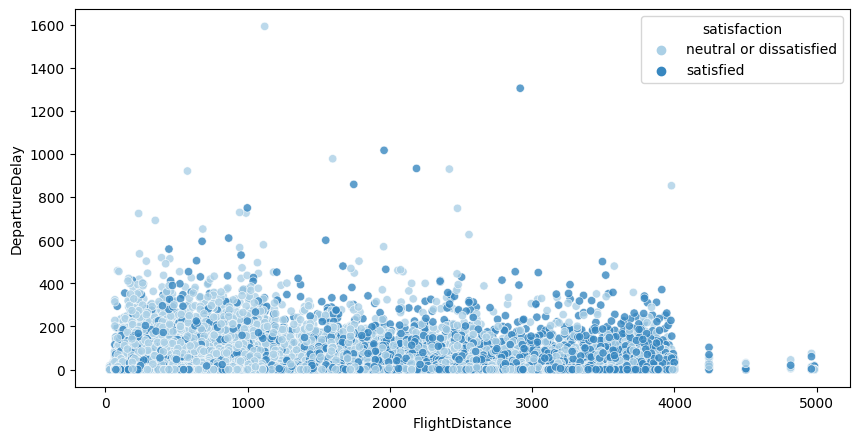

In [244]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='FlightDistance',y='DepartureDelay', hue='satisfaction',palette='Blues', alpha=0.8)

Departure Delay dejar de ser un problema en los vuelos de mayor distancia.

## Rankings

In [245]:
df_1 = df
le = LabelEncoder()
label = le.fit_transform(df_1['satisfaction'])
df_1['Satisfaction']=label

In [246]:
rankings=['Inflight-wifiService',
       'Departure/Arrival_TimeConvenience', 'OnlineBooking_Ease',
       'GateLocation', 'Food/Drink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'On-boardService', 'Leg-roomService',
       'BaggageHandling', 'CheckinService', 'Inflight_service', 'Cleanliness',]

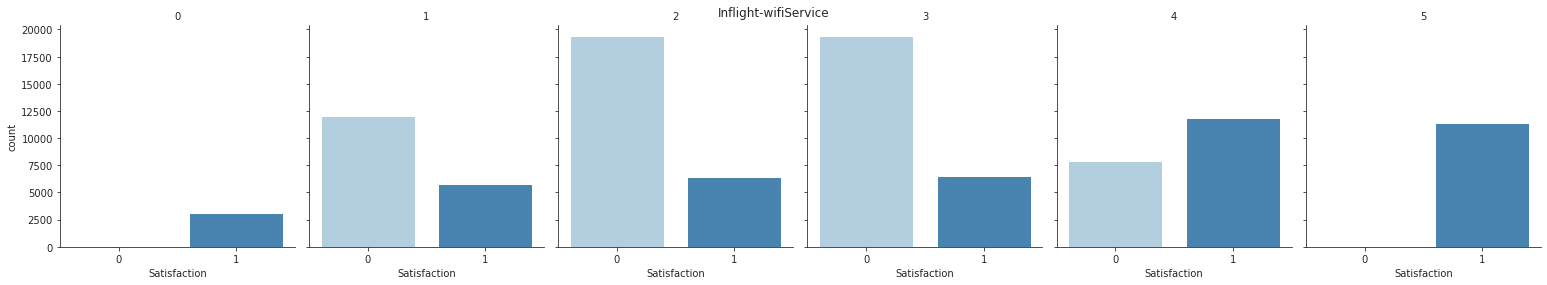

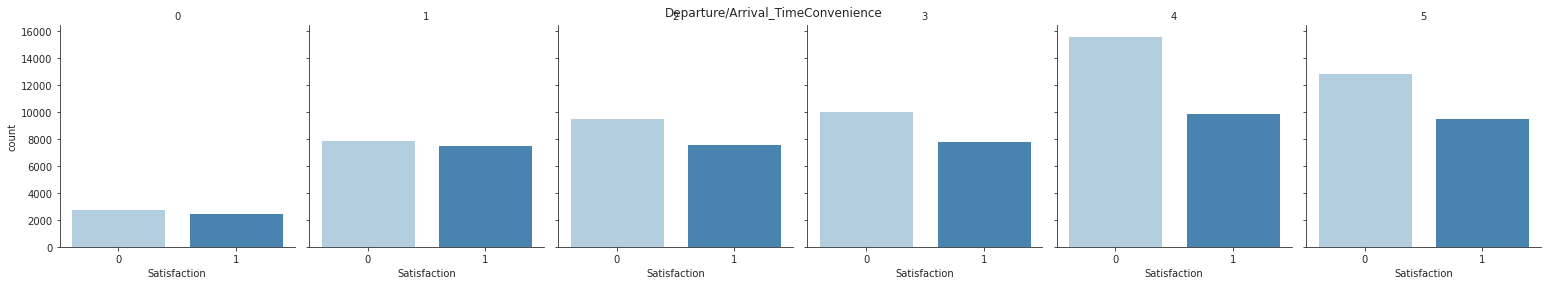

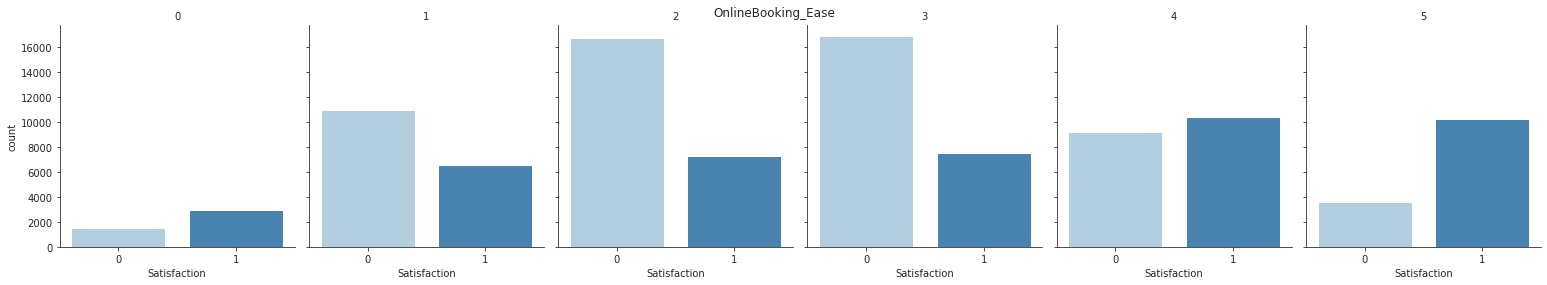

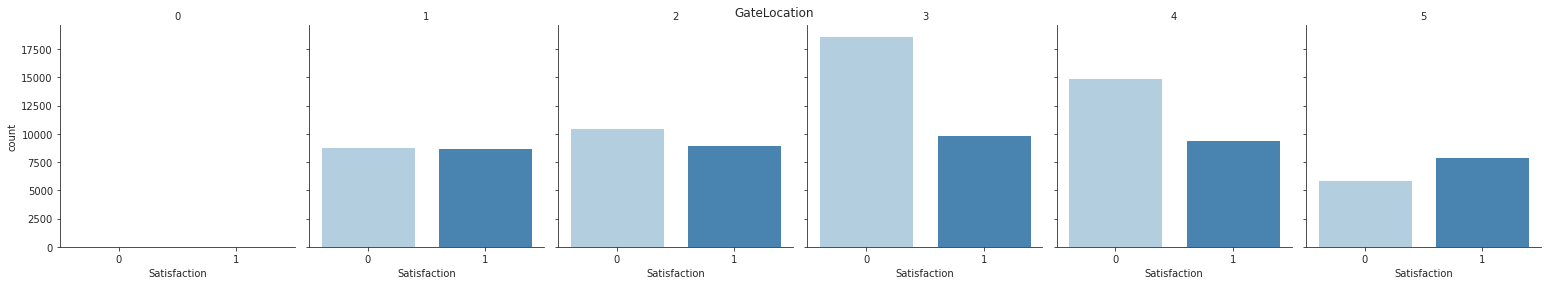

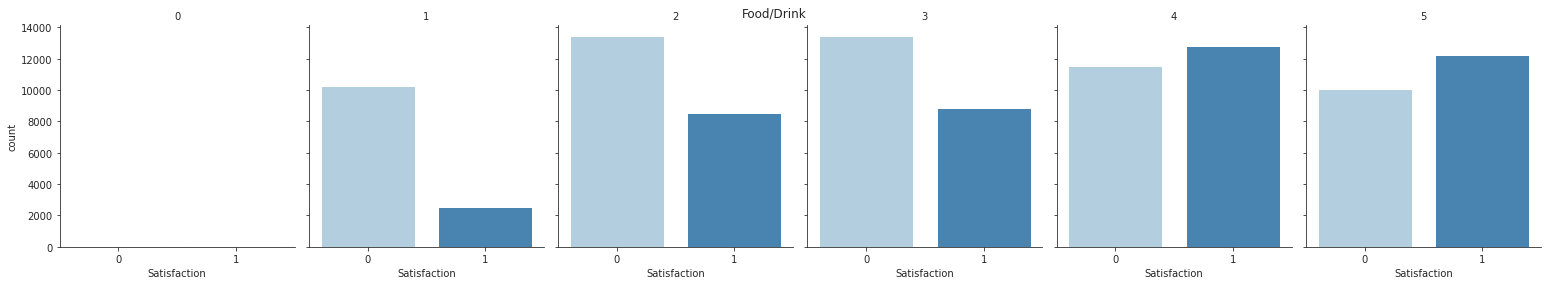

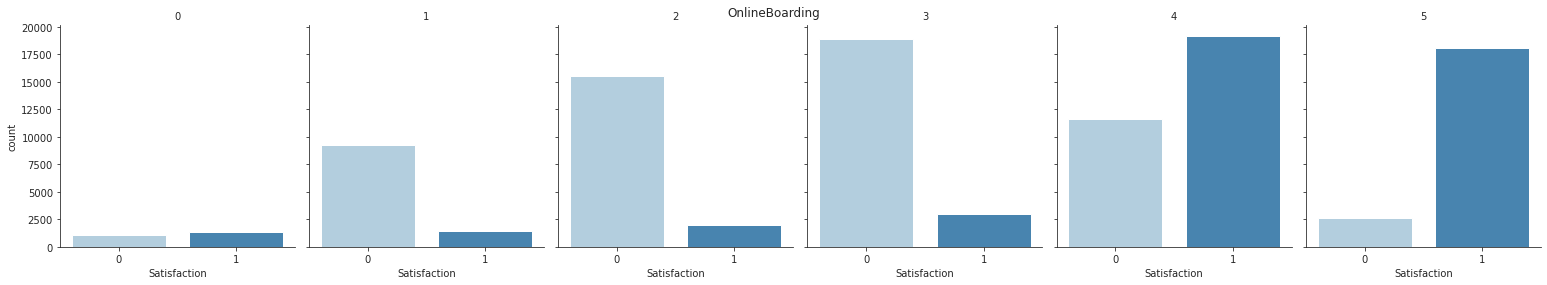

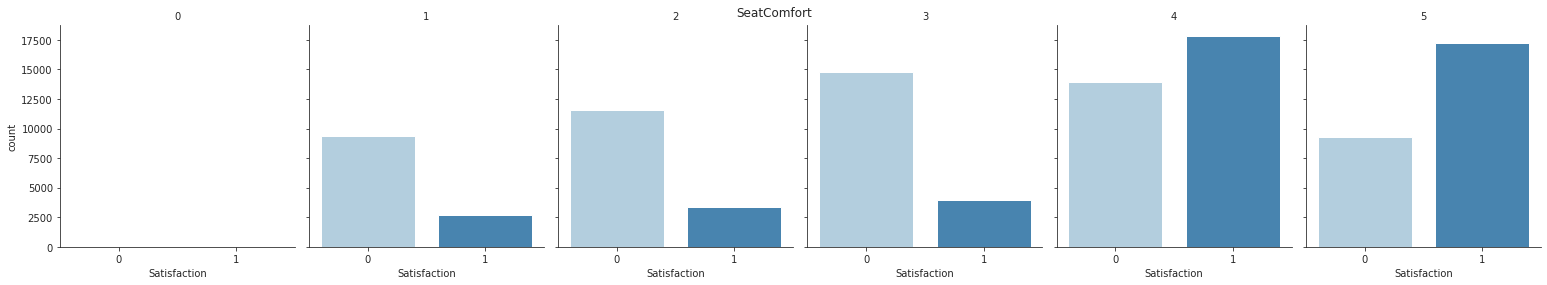

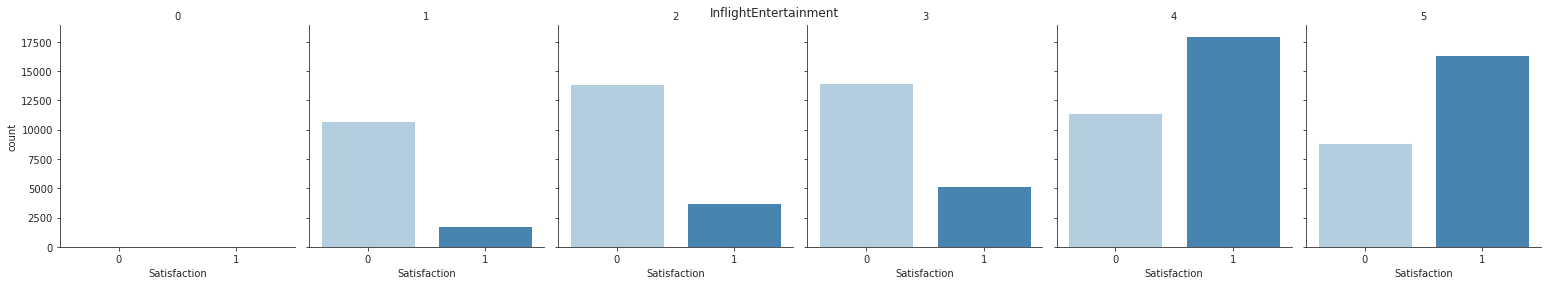

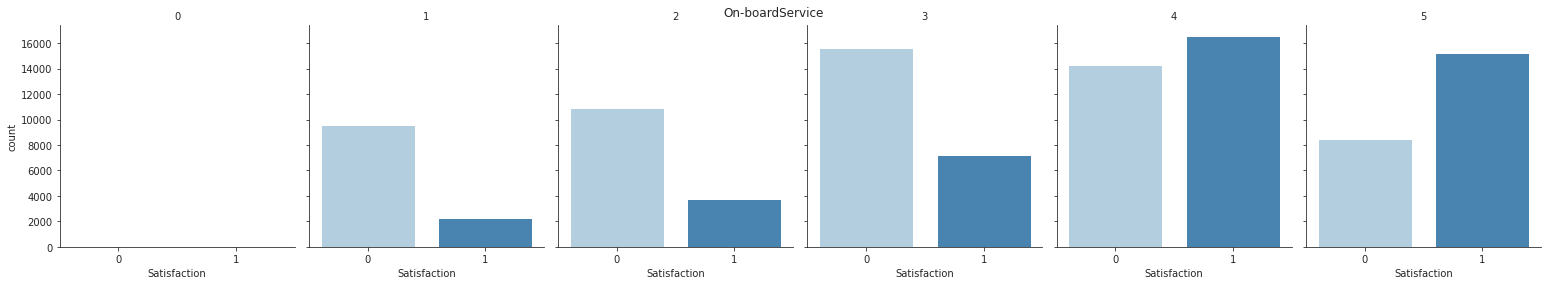

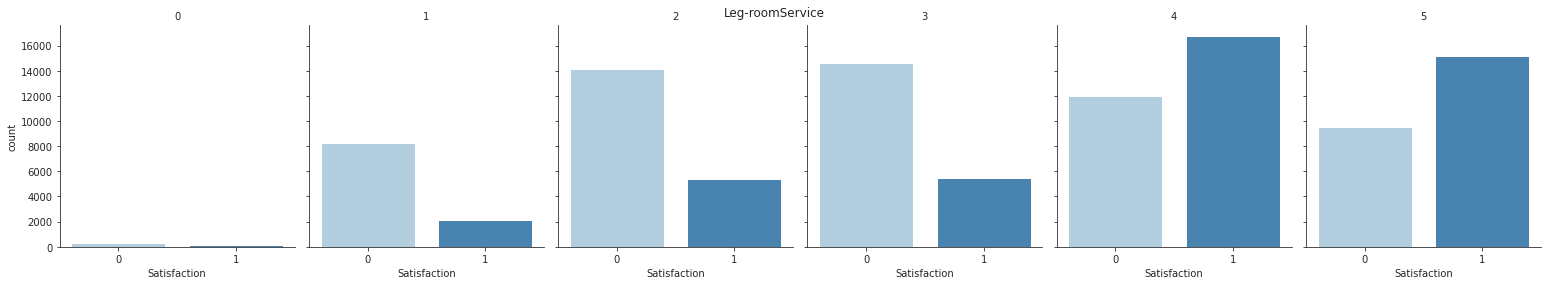

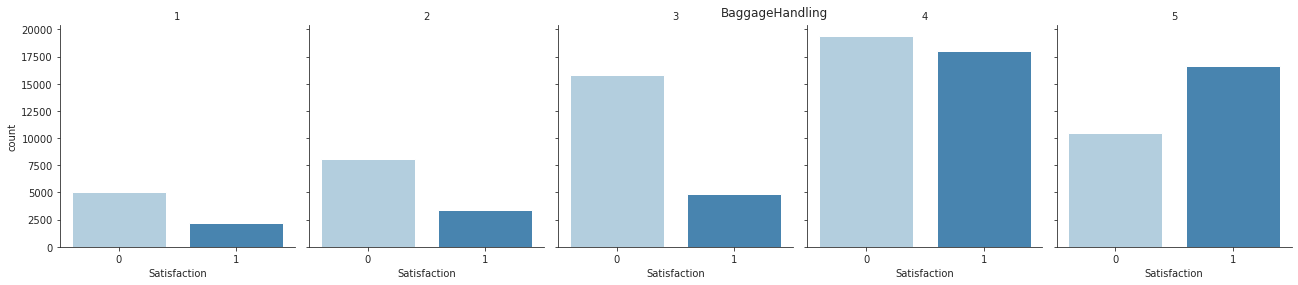

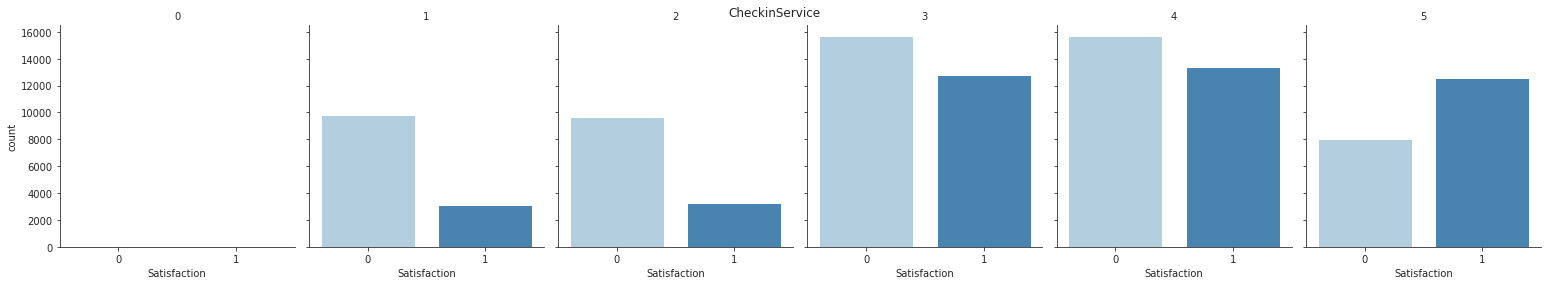

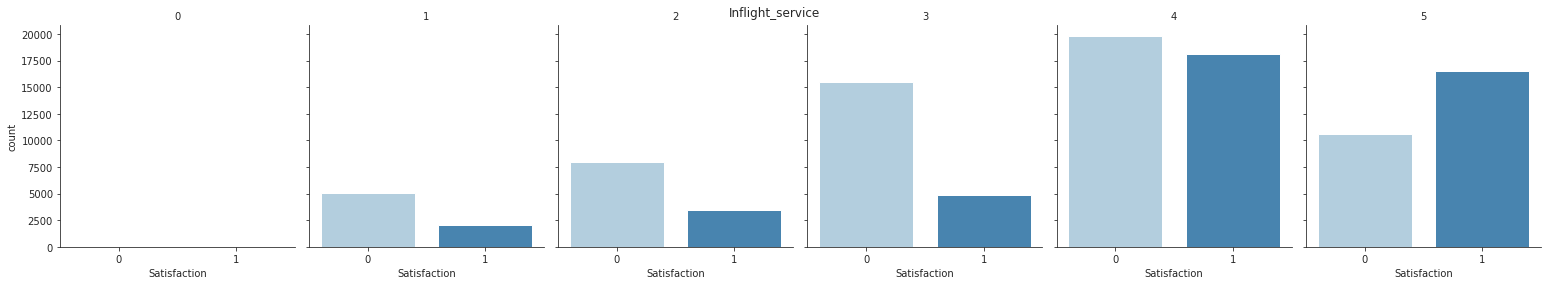

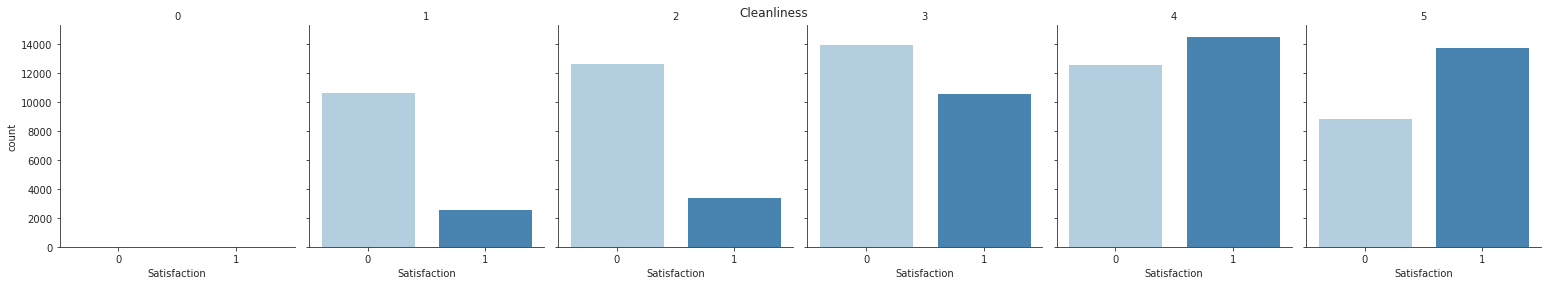

In [247]:
import warnings
warnings.filterwarnings('ignore')
for col in rankings:
    with sns.axes_style(style='ticks'):
      g = sns.catplot("Satisfaction", col=col, col_wrap=6, data=df_1, kind="count", height=4, aspect=0.9,palette="Blues")
      g.set_titles("{col_name}")
      g.fig.suptitle(col)

#**Encoding Variables categoricas**


---
## Satisfaction

In [248]:
le = LabelEncoder()
label = le.fit_transform(df['satisfaction'])
df['Satisfaction']=label

In [249]:
df.loc[:,['satisfaction','Satisfaction']].head(10)

,satisfaction,Satisfaction
0,neutral or dissatisfied,0
1,neutral or dissatisfied,0
2,satisfied,1
3,neutral or dissatisfied,0
4,satisfied,1
5,neutral or dissatisfied,0
6,neutral or dissatisfied,0
7,satisfied,1
8,neutral or dissatisfied,0
9,neutral or dissatisfied,0



---
## Gender

In [250]:
le = LabelEncoder()
label = le.fit_transform(df['Gender'])
df['gender']=label

In [251]:
df.loc[:,['Gender','gender']].head(10)

,Gender,gender
0,Male,1
1,Male,1
2,Female,0
3,Female,0
4,Male,1
5,Female,0
6,Male,1
7,Female,0
8,Female,0
9,Male,1



---
## Customer Type

In [252]:
le = LabelEncoder()
label = le.fit_transform(df['Customer_Type'])
df['CustomerType']=label

In [253]:
df.loc[:,['Customer_Type','CustomerType']].head(5)

,Customer_Type,CustomerType
0,Loyal Customer,0
1,disloyal Customer,1
2,Loyal Customer,0
3,Loyal Customer,0
4,Loyal Customer,0



---
## Type of Travel

In [254]:
le = LabelEncoder()
label = le.fit_transform(df['Type_of_Travel'])
df['TravelType']=label

In [255]:
df.loc[:,['Type_of_Travel','TravelType']].head(5)

,Type_of_Travel,TravelType
0,Personal Travel,1
1,Business travel,0
2,Business travel,0
3,Business travel,0
4,Business travel,0


---
## Class

In [256]:
df=df.join(pd.get_dummies(df['Class']))

In [257]:
df.loc[:,['Class','Business','Eco','Eco Plus']].head(10)

,Class,Business,Eco,Eco Plus
0,Eco Plus,0,0,1
1,Business,1,0,0
2,Business,1,0,0
3,Business,1,0,0
4,Business,1,0,0
5,Eco,0,1,0
6,Eco,0,1,0
7,Business,1,0,0
8,Business,1,0,0
9,Eco,0,1,0



---
## Eliminacion de variables

In [258]:
df=df.drop(['Gender','Class','Type_of_Travel','Customer_Type','satisfaction'],axis=1)

# **Separacion de Datos**

In [259]:
X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [261]:
X.columns

Index(['Age', 'FlightDistance', 'Inflight-wifiService',
       'Departure/Arrival_TimeConvenience', 'OnlineBooking_Ease',
       'GateLocation', 'Food/Drink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'On-boardService', 'Leg-roomService',
       'BaggageHandling', 'CheckinService', 'Inflight_service', 'Cleanliness',
       'DepartureDelay', 'ArrivalDelay', 'gender', 'CustomerType',
       'TravelType', 'Business', 'Eco', 'Eco Plus'],
      dtype='object')

In [262]:
X_train.shape

(83123, 24)

In [263]:
X_test.shape

(20781, 24)

In [264]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# **Modelos**

In [265]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap="Blues")
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc

## **RandomForest Classifier**

Accuracy = 0.9568836918338868
ROC Area under Curve = 0.9543664053933957
              precision    recall  f1-score   support

           0    0.95108   0.97376   0.96229     11739
           1    0.96485   0.93497   0.94967      9042

    accuracy                        0.95688     20781
   macro avg    0.95796   0.95437   0.95598     20781
weighted avg    0.95707   0.95688   0.95680     20781



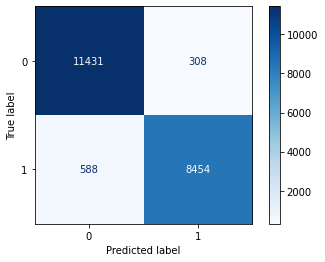

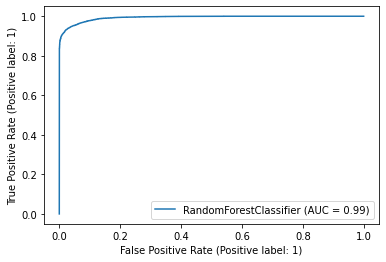

In [266]:
from sklearn.ensemble import RandomForestClassifier
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)



---



In [267]:
random = RandomForestClassifier()
random.fit(X_train, y_train)

RandomForestClassifier()

In [268]:
print("R2 score:",random.score(X_test,y_test))

R2 score: 0.9605408786872625


In [269]:
pred_rand = random.predict(X_test)
pred_prob_rand = random.predict_proba(X_test)[:,1]

In [270]:
roc_auc_score(y_test, pred_prob_rand)

0.9936304901081678

## **Decision Tree Classifier**

Accuracy = 0.9458158895144603
ROC Area under Curve = 0.9448113845075312
              precision    recall  f1-score   support

           0    0.95158   0.95255   0.95206     11739
           1    0.93832   0.93707   0.93769      9042

    accuracy                        0.94582     20781
   macro avg    0.94495   0.94481   0.94488     20781
weighted avg    0.94581   0.94582   0.94581     20781



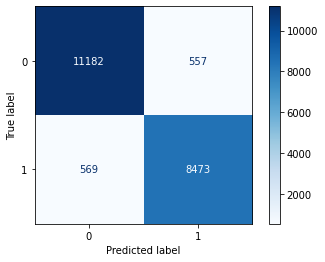

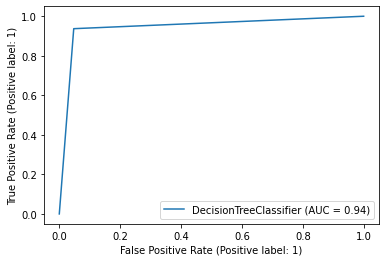

In [271]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt, accuracy_dt, roc_auc_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

---

In [272]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [273]:
dec_tree.score(X_test,y_test)

0.9458158895144603

In [274]:
pred_dec_tree = dec_tree.predict(X_test)
pred_prob_dec_tree = dec_tree.predict_proba(X_test)[:,1]

In [275]:
roc_auc_score(y_test, pred_prob_dec_tree)

0.9448113845075312

## **Extra Trees**

Accuracy = 0.9248351859871998
ROC Area under Curve = 0.9231790390337326
              precision    recall  f1-score   support

           0    0.93134   0.93594   0.93363     11739
           1    0.91630   0.91042   0.91335      9042

    accuracy                        0.92484     20781
   macro avg    0.92382   0.92318   0.92349     20781
weighted avg    0.92479   0.92484   0.92481     20781



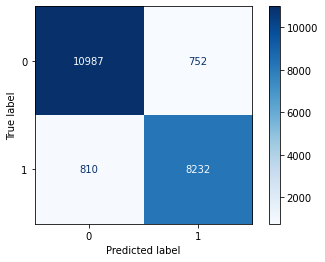

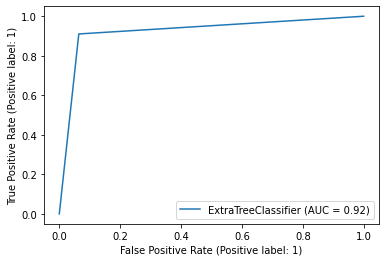

In [276]:
model_et = ExtraTreeClassifier(random_state=42)
model_et, accuracy_et, roc_auc_et = run_model(model_et, X_train, y_train, X_test, y_test)

---

In [277]:
extra_tree= ExtraTreeClassifier(random_state=42)
extra_tree.fit(X_train,y_train)

ExtraTreeClassifier(random_state=42)

In [278]:
extra_tree.score(X_test,y_test)

0.9248351859871998

In [279]:
pred_extra_tree = extra_tree.predict(X_test)
pred_prob_extra_tree = extra_tree.predict_proba(X_test)[:,1]

In [280]:
roc_auc_score(y_test, pred_prob_extra_tree)

0.9231790390337326

## **Adaptive Gradient Boosting**

Accuracy = 0.9287810981184736
ROC Area under Curve = 0.9264429906086671
              precision    recall  f1-score   support

           0    0.93051   0.94446   0.93743     11739
           1    0.92646   0.90843   0.91736      9042

    accuracy                        0.92878     20781
   macro avg    0.92848   0.92644   0.92739     20781
weighted avg    0.92875   0.92878   0.92870     20781



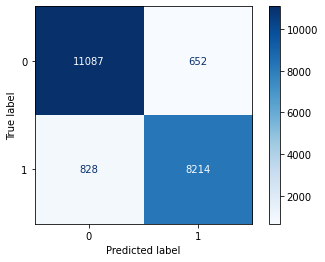

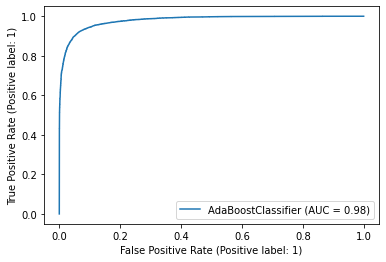

In [281]:
params_ada ={'n_estimators': 500,
              'random_state': 12345}

model_ada = AdaBoostClassifier(**params_ada)
model_ada, accuracy_ada, roc_auc_ada = run_model(model_ada, X_train, y_train, X_test, y_test)



---



In [282]:
ADA = AdaBoostClassifier()
ADA.fit(X_train,y_train)

AdaBoostClassifier()

In [283]:
ADA.score(X_test,y_test)

0.92632693325634

In [284]:
pred_ada = ADA.predict(X_test)
pred_prob_ada = ADA.predict_proba(X_test)[:,1]

In [285]:
roc_auc_score(y_test, pred_prob_ada)

0.977290886559262

## **XG Boost**

Accuracy = 0.9623213512343005
ROC Area under Curve = 0.9599798012206772
              precision    recall  f1-score   support

           0    0.95627   0.97802   0.96702     11739
           1    0.97060   0.94194   0.95605      9042

    accuracy                        0.96232     20781
   macro avg    0.96344   0.95998   0.96154     20781
weighted avg    0.96251   0.96232   0.96225     20781



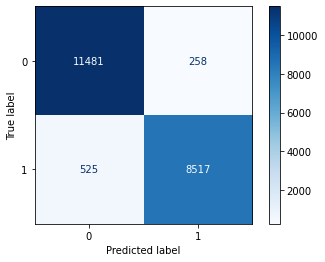

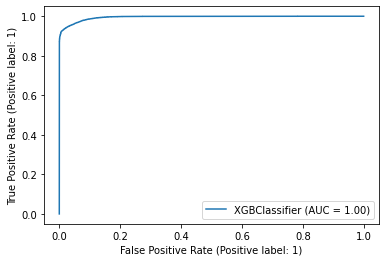

In [286]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)



---



In [287]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier()

In [288]:
XGB.score(X_test,y_test)

0.9385496366873587

## **Red Neuronal**

Accuracy = 0.9453346807179636
ROC Area under Curve = 0.942340039861683
              precision    recall  f1-score   support

           0    0.93948   0.96541   0.95227     11739
           1    0.95343   0.91927   0.93604      9042

    accuracy                        0.94533     20781
   macro avg    0.94646   0.94234   0.94415     20781
weighted avg    0.94555   0.94533   0.94521     20781



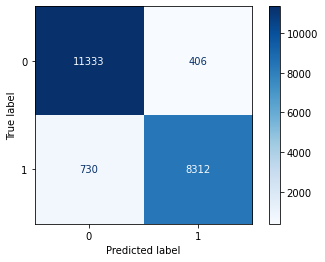

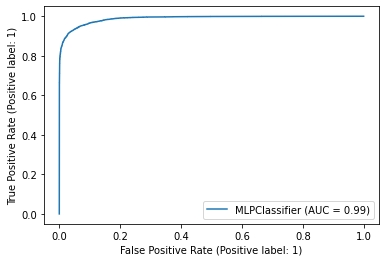

In [289]:
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

## **K-Nearest Neighbors**

Accuracy = 0.9233434387180598
ROC Area under Curve = 0.9156970031609312
              precision    recall  f1-score   support

           0    0.89832   0.97461   0.93491     11739
           1    0.96296   0.85678   0.90677      9042

    accuracy                        0.92334     20781
   macro avg    0.93064   0.91570   0.92084     20781
weighted avg    0.92644   0.92334   0.92267     20781



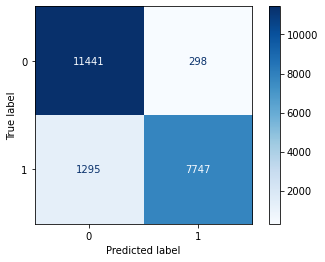

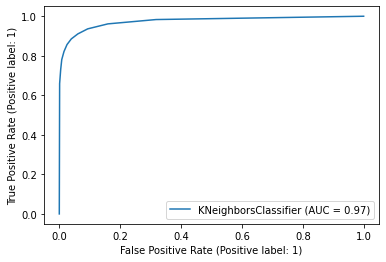

In [290]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

## **Logistic Regression**

Accuracy = 0.8733458447620422
ROC Area under Curve = 0.8687113542825646
              precision    recall  f1-score   support

           0    0.87548   0.90442   0.88972     11739
           1    0.87035   0.83300   0.85127      9042

    accuracy                        0.87335     20781
   macro avg    0.87292   0.86871   0.87049     20781
weighted avg    0.87325   0.87335   0.87299     20781



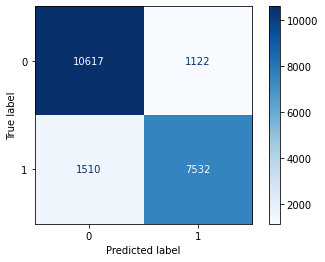

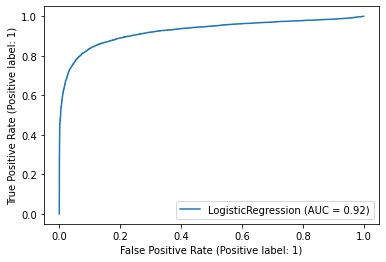

In [291]:
model_lr=LogisticRegression()
model_lr, accuracy_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

## **Hist Gradient Boosting**

Accuracy = 0.9640055820220393
ROC Area under Curve = 0.9611656520924897
              precision    recall  f1-score   support

           0    0.95459   0.98305   0.96861     11739
           1    0.97711   0.93928   0.95782      9042

    accuracy                        0.96401     20781
   macro avg    0.96585   0.96117   0.96321     20781
weighted avg    0.96438   0.96401   0.96391     20781



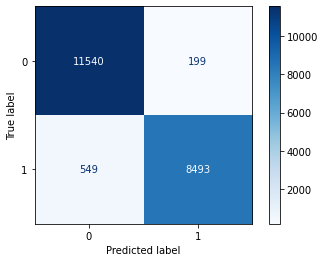

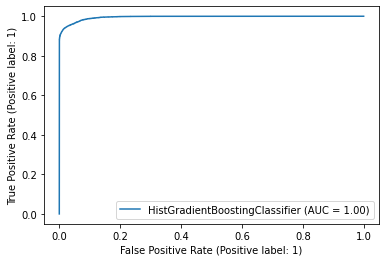

In [292]:
model_hgb = HistGradientBoostingClassifier(max_bins=150, max_iter=250,max_depth=25,learning_rate=0.1,max_leaf_nodes=55)
model_hgb, accuracy_hgb, roc_auc_hgb = run_model(model_hgb, X_train, y_train, X_test, y_test)

---

In [293]:
HGB = HistGradientBoostingClassifier(max_bins=150, max_iter=250,max_depth=25,learning_rate=0.1,max_leaf_nodes=55)
HGB.fit(X_train,y_train)

HistGradientBoostingClassifier(max_bins=150, max_depth=25, max_iter=250,
                               max_leaf_nodes=55)

In [294]:
HGB.score(X_test,y_test)

0.9637168567441413

In [297]:
pred_hgb= HGB.predict(X_test)
pred_prob_hgb = HGB.predict_proba(X_test)[:,1]

In [298]:
roc_auc_score(y_test, pred_prob_hgb)

0.9954172461386855



---

